In [53]:
import openai
import pickle
import matplotlib.pyplot as plt

In [4]:
with open(".key", "r") as f:
    api_key = f.read()

In [6]:
client = openai.OpenAI(api_key=api_key)

In [7]:
# prompt = "Question: Tell me a bio of Amelia Earhart.\nAnswer"

# completion = client.chat.completions.create(
#   model="gpt-4o-mini",
#   messages=[
#     {"role": "user", "content": prompt}
#   ],
#   logprobs=True,
#   top_logprobs=20
# )

# with open('amelia_earhart_bio.pickle', 'wb') as handle:
#     pickle.dump(completion, handle)

In [46]:
with open('amelia_earhart_bio.pickle', 'rb') as handle:
    completion = pickle.load(handle)

In [47]:
completion.choices[0].message

ChatCompletionMessage(content="Amelia Earhart (1897-1937) was an American aviation pioneer, author, and women’s rights advocate, renowned for her groundbreaking achievements in aviation and her adventurous spirit. Born on July 24, 1897, in Atchison, Kansas, Earhart developed a fascination with flight at an early age. She attended Smith College but left to assist in the war effort during World War I, working as a nurse in Canada.\n\nIn 1920, Earhart took her first plane ride, which ignited her passion for flying. She earned her pilot's license in 1923, making her the 16th woman in the United States to do so. She quickly gained recognition for her flying skills, setting various records, including being the first woman to fly solo across the Atlantic Ocean in 1932. This historic flight earned her international fame and the United States Distinguished Flying Cross, making her the first woman to receive this honor.\n\nBeyond her flying achievements, Earhart was also an author and wrote seve

In [48]:
print(completion.choices[0].message.content)

Amelia Earhart (1897-1937) was an American aviation pioneer, author, and women’s rights advocate, renowned for her groundbreaking achievements in aviation and her adventurous spirit. Born on July 24, 1897, in Atchison, Kansas, Earhart developed a fascination with flight at an early age. She attended Smith College but left to assist in the war effort during World War I, working as a nurse in Canada.

In 1920, Earhart took her first plane ride, which ignited her passion for flying. She earned her pilot's license in 1923, making her the 16th woman in the United States to do so. She quickly gained recognition for her flying skills, setting various records, including being the first woman to fly solo across the Atlantic Ocean in 1932. This historic flight earned her international fame and the United States Distinguished Flying Cross, making her the first woman to receive this honor.

Beyond her flying achievements, Earhart was also an author and wrote several books about her flight experien

In [49]:
print(f"Usage: {completion.usage}")

Usage: CompletionUsage(completion_tokens=382, prompt_tokens=19, total_tokens=401, completion_tokens_details=CompletionTokensDetails(reasoning_tokens=0))


In [50]:
len(completion.choices[0].logprobs.content)

382

In [51]:
completion.choices[0].logprobs.content[0].top_logprobs

[TopLogprob(token='Am', bytes=[65, 109], logprob=-0.00020592446),
 TopLogprob(token='**', bytes=[42, 42], logprob=-8.500206),
 TopLogprob(token='Certainly', bytes=[67, 101, 114, 116, 97, 105, 110, 108, 121], logprob=-13.750206),
 TopLogprob(token='###', bytes=[35, 35, 35], logprob=-14.500206),
 TopLogprob(token='Sure', bytes=[83, 117, 114, 101], logprob=-14.625206),
 TopLogprob(token=' Amelia', bytes=[32, 65, 109, 101, 108, 105, 97], logprob=-15.750206),
 TopLogprob(token='Born', bytes=[66, 111, 114, 110], logprob=-16.125206),
 TopLogprob(token='Amy', bytes=[65, 109, 121], logprob=-16.500206),
 TopLogprob(token='A', bytes=[65], logprob=-17.250206),
 TopLogprob(token='***', bytes=[42, 42, 42], logprob=-18.375206),
 TopLogprob(token=' Am', bytes=[32, 65, 109], logprob=-18.750206),
 TopLogprob(token='Em', bytes=[69, 109], logprob=-18.875206),
 TopLogprob(token='Absolutely', bytes=[65, 98, 115, 111, 108, 117, 116, 101, 108, 121], logprob=-18.875206),
 TopLogprob(token='*', bytes=[42], logp

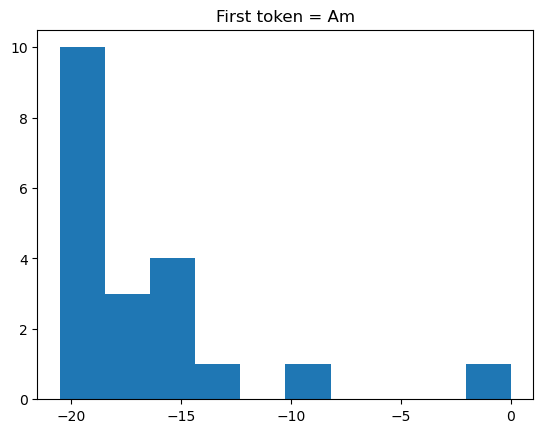

In [61]:
dat = completion.choices[0].logprobs.content[0]
plt.hist([i.logprob for i in dat.top_logprobs])
plt.title(f"First token = {dat.token}")
plt.show()

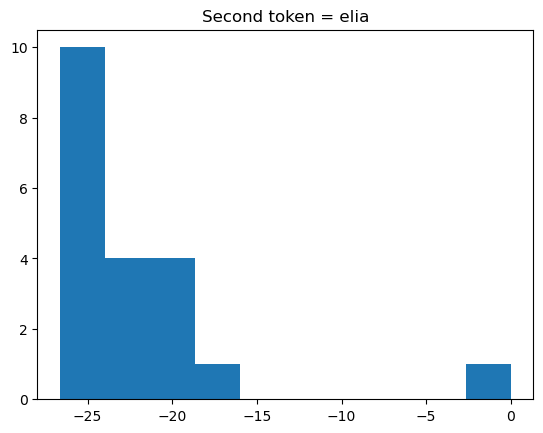

In [62]:
dat = completion.choices[0].logprobs.content[1]
plt.hist([i.logprob for i in dat.top_logprobs])
plt.title(f"Second token = {dat.token}")
plt.show()